In [18]:
import pydot
from IPython.display import Image, display

In [20]:
class tree:
    class Node:
        def __init__(self, parent=None, is_leaf=False, element=None):
            self.parent = parent
            self.children = []
            self.is_leaf = is_leaf
            self.element = element

    def __init__(self):
        self.root = None
        self.graph = pydot.Dot(graph_type='graph', strict=True)
        self.size = 0

    def _make_tree(self, input, prnt=None):
        if not isinstance(input, tuple):
            u = pydot.Node(name=str(self.size), label=str(input), shape='plain')
            self.graph.add_node(u)
            self.size += 1
            self.graph.add_node(u)
            new_node = self.Node(parent=prnt, is_leaf=True, element=input)
            return new_node, u

        parent = self.Node(parent=prnt)
        string = 'Node' 
        u = pydot.Node(name=str(self.size), label=' ', shape='point')
        self.graph.add_node(u)
        self.size += 1
        for i in input:
            node, v = self._make_tree(i, parent)
            parent.children.append(node)
            self.graph.add_edge(pydot.Edge(u, v))

        return parent, u


    def make_tree(self, input):
        self.root, _ = self._make_tree(input)

    def write_graph(self):
        print("the given tree:")
        im = Image(self.graph.create_png())
        display(im)

    def to_string(self, p:Node):
        if p.is_leaf:
            return str(p.element)
        out = '('
        for i in p.children:
            out += self.to_string(i) + ','
        
        return out[:-1] + ')'

    def iteration(self, address:tuple):
        p = self.root
        for i in address:
            p = p.children[i]
        return p

    def reference(self, ref):
        p = self.iteration(ref)
        return self.to_string(p)



the given tree:


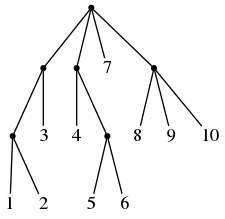

6
((1,2),3)


In [21]:
t = tree()
tup = (((1, 2), 3), (4, (5, 6)), 7, (8, 9, 10))
t.make_tree(tup)
t.write_graph()

Tup = (1,1,1)
print(t.reference(Tup))
Tup = (0,)
print(t.reference(Tup))